In [6]:
import gseapy as gp
import pandas as pd 

In [7]:
rnk = pd.read_csv("/Users/kanaaax/Desktop/GSEA/STR3_MOTOR_GOALLREACTKEGG_500.GseaPreranked.1559602912792/edb/GSEA_STR3_MOTOR_pearson.rnk", header=None, sep="\t")
rnk.head()



,0,1
0,RPL22,0.662216
1,COL16A1,0.658249
2,ELL2,0.649734
3,AC005393.1,0.649488
4,C17orf56,0.646483


In [8]:
gp.prerank

<function gseapy.gsea.prerank(rnk, gene_sets, outdir='GSEA_Prerank', pheno_pos='Pos', pheno_neg='Neg', min_size=15, max_size=500, permutation_num=1000, weighted_score_type=1, ascending=False, processes=1, figsize=(6.5, 6), format='pdf', graph_num=20, no_plot=False, seed=None, verbose=False)>

In [15]:
# run prerank
# enrichr libraries are supported by prerank module. Just provide the name
# use 4 process to acceralate the permutation speed

# note: multiprocessing may not work on windows
pre_res = gp.prerank(rnk=rnk, 
                     gene_sets='/Users/kanaaax/Desktop/GSEA/STR3_MOTOR_GOALLREACTKEGG_500.GseaPreranked.1559602912792/edb/gene_sets.gmt',
                     processes=4,
                     min_size = 15,
                     max_size = 500,
                     graph_num= 500,
                     permutation_num=100, # reduce number to speed up testing
                     outdir='/Users/kanaaax/Desktop/test/gseapy_STR3_MOTOR_GOALLREACTKEGG_500', format='png')

In [50]:
pre_res.res2d.sort_values("nes")

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
GO_POSITIVE_REGULATION_OF_TYROSINE_PHOSPHORYLATION_OF_STAT3_PROTEIN,-0.323299,-220.092062,0.0,0.0,37,37,STAT3;ARL2BP;GH1;HDAC2;VEGFA;LIF;IL6R;CSF1R;CT...,IL15;HES1;IL31RA;IL24;LEP;IL12B;IL23R;IL20;GHR...
GO_MICROTUBULE_BUNDLE_FORMATION,-0.334787,-207.909258,0.0,0.0,59,59,PSRC1;TTLL3;CDK5RAP2;DNAH1;GAS2L1;BBS2;TPPP;FE...,HYDIN;CCDC103;GAS2L2;MAP2;DNAH7;C19orf51;PLA2G...
GO_NEUROTRANSMITTER_RECEPTOR_ACTIVITY,-0.336906,-188.635465,0.0,0.0,68,68,ZACN;TSPO;DRD4;P2RY11;CHRNA10;GRIN2A;CHRM5;CHR...,GRIN3A;GABRB3;CHRNA6;GABRA3;CHRNA9;GRIK2;GABRA...
GO_ADENYLATE_CYCLASE_ACTIVATING_G_PROTEIN_COUPLED_RECEPTOR_SIGNALING_PATHWAY,-0.300574,-187.278353,0.0,0.0,73,73,ADCY4;SLC9A3R1;S1PR4;RAPGEF2;GNB1;UCN2;DRD5;GH...,ADCY3;PTHLH;RXFP2;GNAL;NPR3;ADCY8;ADCYAP1;ADRA...
GO_POSITIVE_REGULATION_OF_OSSIFICATION,-0.235535,-187.225831,0.0,0.0,83,83,P2RX7;ILK;GPM6B;TMEM119;OXT;IFITM1;ATP6AP1;TOB...,WNT7B;JAG1;CD276;SFRP2;LTF;GJA1;ANO6;TP63;BMPR...
GO_GLUTAMATE_RECEPTOR_SIGNALING_PATHWAY,-0.307146,-173.561478,0.0,0.0,41,41,HOMER3;GRM3;GRIN2A;CLN3;GRIN1;FMR1;CPEB4;GRIK4...,GRIN2B;SSTR1;GRIA1;CDK5R1;GRID2;GRIK1;PTK2B;GR...
GO_RESPONSE_TO_BMP,-0.257849,-170.560421,0.0,0.0,94,94,MEGF8;GDF1;MAPK3;ENG;RGMA;SMURF1;UBE2D3;SLC33A...,BMPR1B;FAM83G;GATA5;MYH6;BMP3;TMEM100;BMPR2;GR...
GO_NEUROPEPTIDE_SIGNALING_PATHWAY,-0.343362,-165.420414,0.0,0.0,98,98,NPFF;NXPH3;SORT1;GPR44;RAPGEF2;SCG5;UCN;UTS2R;...,NXPH2;TAC3;GPR149;NPY2R;OPRL1;PRLHR;SORCS1;GPR...
GO_REGULATION_OF_AMINE_TRANSPORT,-0.218581,-155.222415,0.0,0.0,71,71,P2RX7;ARL6IP5;DPYSL2;OXT;PINK1;ADORA1;SEPT2;KC...,NPY2R;AVPR1A;LEP;TRH;CHRNA6;RAB3B;CNR1;NTSR1;P...


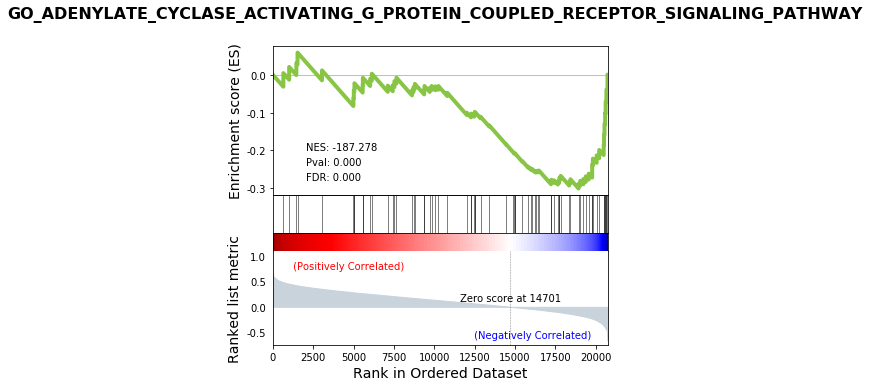

In [33]:
from gseapy.plot import gseaplot
gseaplot(rank_metric=pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])


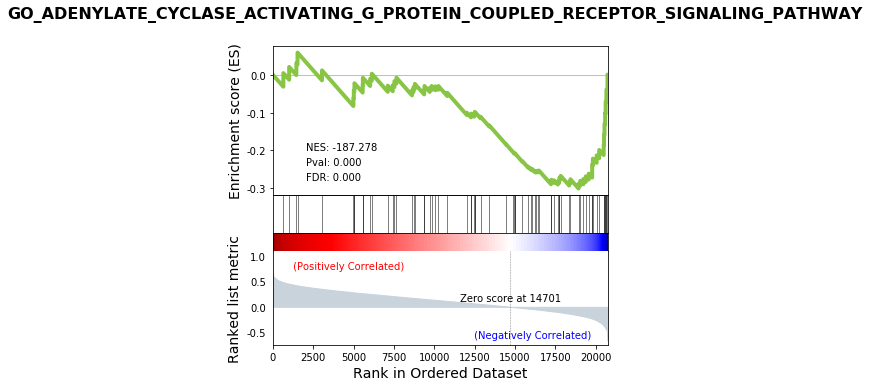

In [36]:
from gseapy.plot import gseaplot, heatmap
terms = pre_res.res2d.index
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
gseaplot(pre_res.ranking, term=terms[0], **pre_res.results[terms[0]])

In [37]:
# plotting heatmap
genes = pre_res.res2d.genes[0].split(";")
genes

['ADCY4',
 'SLC9A3R1',
 'S1PR4',
 'RAPGEF2',
 'GNB1',
 'UCN2',
 'DRD5',
 'GHRHR',
 'ADCY1',
 'ADRB2',
 'ADCY7',
 'GPER',
 'GPR78',
 'PTH1R',
 'GPR133',
 'ADRA2C',
 'PTGER2',
 'CRHR1',
 'GNAQ',
 'CALCA',
 'GPR3',
 'ADRB3',
 'GPR21',
 'ADRA1B',
 'ADCY6',
 'ADORA2A',
 'PTGIR',
 'GHRH',
 'OR56A4',
 'ADCY5',
 'ADCY2',
 'GCGR',
 'DRD2',
 'ADCY9',
 'GNA13',
 'PDE4D',
 'GPR52',
 'ADRB1',
 'DRD1',
 'ADM2',
 'ADRA2B',
 'PTH',
 'GNG2',
 'CHGA',
 'LHCGR',
 'GALR2',
 'OR13F1',
 'OR56A5',
 'UCN3',
 'VIP',
 'ADORA2B',
 'OR5T1',
 'FSHR',
 'ADRA2A',
 'OR56A1',
 'TSHR',
 'ADCY3',
 'PTHLH',
 'RXFP2',
 'GNAL',
 'NPR3',
 'ADCY8',
 'ADCYAP1',
 'ADRA1A',
 'GNAS',
 'ADRA1D',
 'GALR1',
 'DRD3',
 'CALCRL',
 'GPR101',
 'GPR26',
 'CALCR',
 'OPRM1']

In [39]:
# Make sure that ``ofname`` is not None, if you want to save your figure to disk
heatmap(df = pre_res.heatmar.loc[genes], z_score=0, title=terms[0], figsize=(18,6))

AttributeError: 'Prerank' object has no attribute 'heatmar'